## Problem Statement

This tutorial takes a practical and coding-focused approach. We'll define the terms _machine learning_ and _linear regression_ in the context of a problem, and later generalize their definitions. We'll work through a typical machine learning problem step-by-step:


> **QUESTION**: ACME Insurance Inc. offers affordable health insurance to thousands of customer all over the United States. As the lead data scientist at ACME, **you're tasked with creating an automated system to estimate the annual medical expenditure for new customers**, using information such as their age, sex, BMI, children, smoking habits and region of residence. 
>
> Estimates from your system will be used to determine the annual insurance premium (amount paid every month) offered to the customer. Due to regulatory requirements, you must be able to explain why your system outputs a certain prediction.
> 
> You're given a [CSV file](https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv) containing verified historical data, consisting of the aforementioned information and the actual medical charges incurred by over 1300 customers. 
> <img src="https://i.imgur.com/87Uw0aG.png" width="480">
>
> Dataset source: https://github.com/stedy/Machine-Learning-with-R-datasets


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
medical_df = pd.read_csv(r'C:\\Users\\CICD STUDENT\\Desktop\\Data-Analytics-A\\Datasets\\medical-charges.csv')
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Each row of the dataset contains information about one customer. 

Our objective is to find a way to estimate the value in the "charges" column using the values in the other columns. If we can do so for the historical data, then we should able to estimate charges for new customers too, simply by asking for information like their age, sex, BMI, no. of children, smoking habits and region.

In [3]:
# checking data types

medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
# getting statistics for the numerical columns

medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Exploratory Data Analysis

Let's explore the data by visualizing the distribution of values in some columns of the dataset, and the relationships between "charges" and other columns.

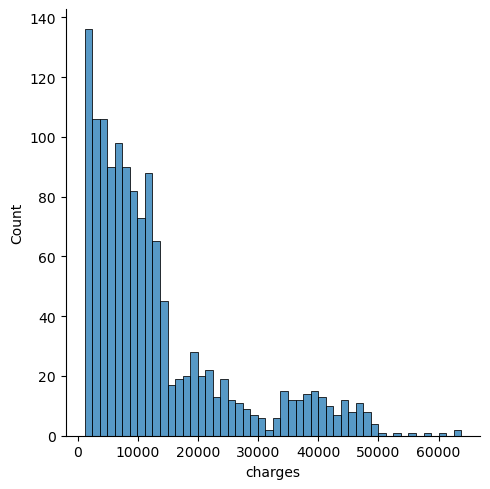

In [6]:
sns.displot(data=medical_df, x='charges', bins=50)

age diff: 46


<Figure size 600x400 with 0 Axes>

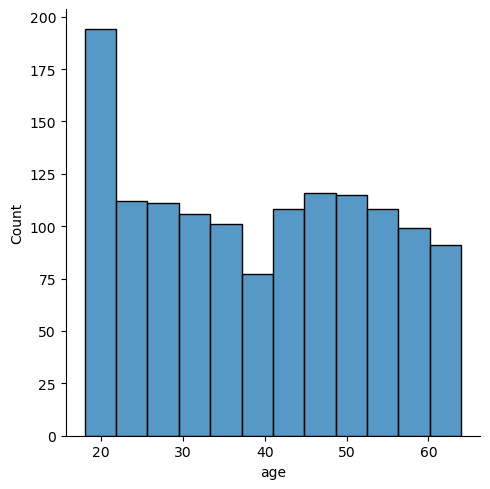

In [16]:
# age

age_diff = max(medical_df.age) - min(medical_df.age)

# plotting distribution of age

plt.figure(figsize=(6, 4))
sns.displot(data=medical_df, x='age')
# plt.tight_layout()

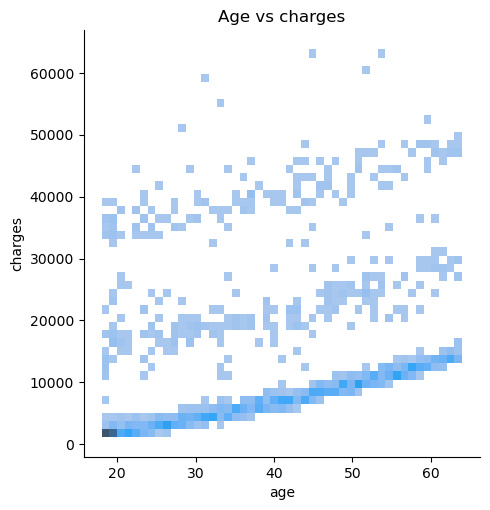

In [21]:
# plotting distribution of age vs premium

sns.displot(data=medical_df, x='age', y='charges', bins=age_diff + 1)
plt.title('Age vs charges');

<Axes: xlabel='bmi', ylabel='Count'>

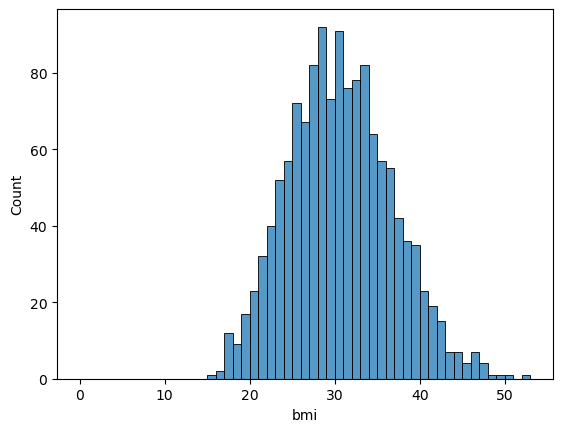

In [23]:
# distribution of BMI

bmi_max = max(medical_df.bmi)
bins = np.linspace(0, int(bmi_max), int(bmi_max) + 1)
sns.histplot(data=medical_df, x='bmi', bins=bins)

### Charges

Let's visualize the distribution of "charges" i.e. the annual medical charges for customers. This is the column we're trying to predict. Let's also use the categorical column "smoker" to distinguish the charges for smokers and non-smokers.

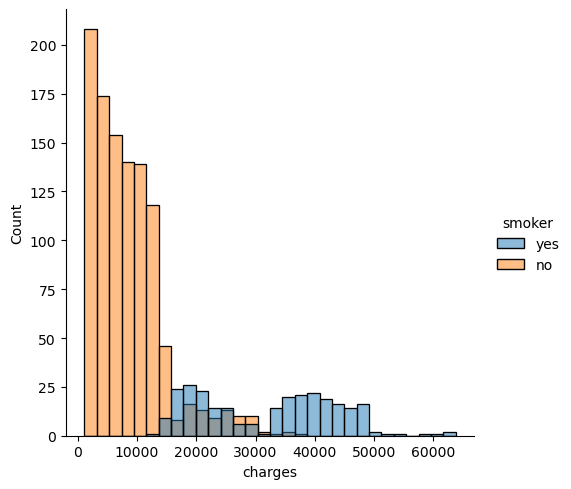

In [25]:
sns.displot(data=medical_df, x='charges', hue='smoker')

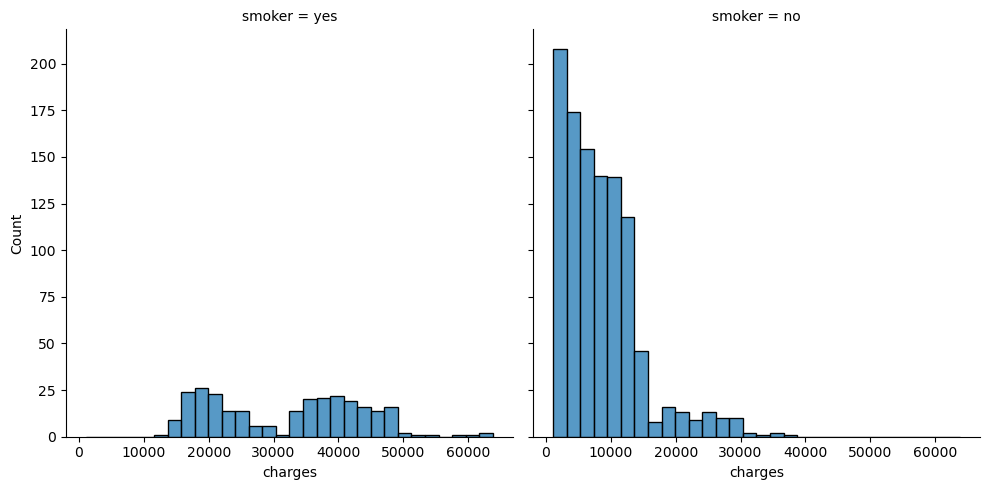

In [26]:
sns.displot(data=medical_df, x='charges', col='smoker')

We can make the following observations from the above graph:

* For most customers, the annual medical charges are under \\$10,000. Only a small fraction of customer have higher medical expenses, possibly due to accidents, major illnesses and genetic diseases. The distribution follows a "power law"
* There is a significant difference in medical expenses between smokers and non-smokers. While the median for non-smokers is \\$7300, the median for smokers is close to \\$35,000.


> **EXERCISE**: Visualize the distribution of medical charges in connection with other factors like "sex" and "region". What do you observe?

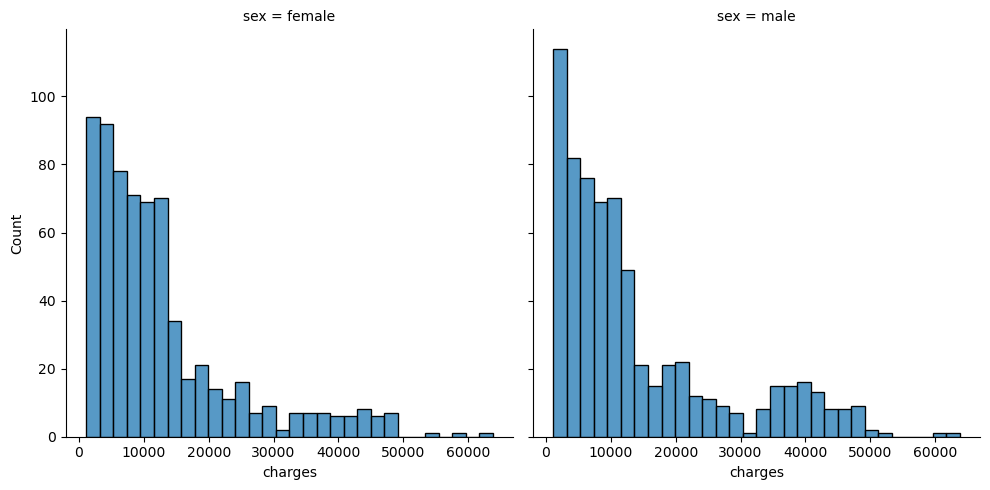

In [27]:
sns.displot(data=medical_df, x='charges', col='sex')

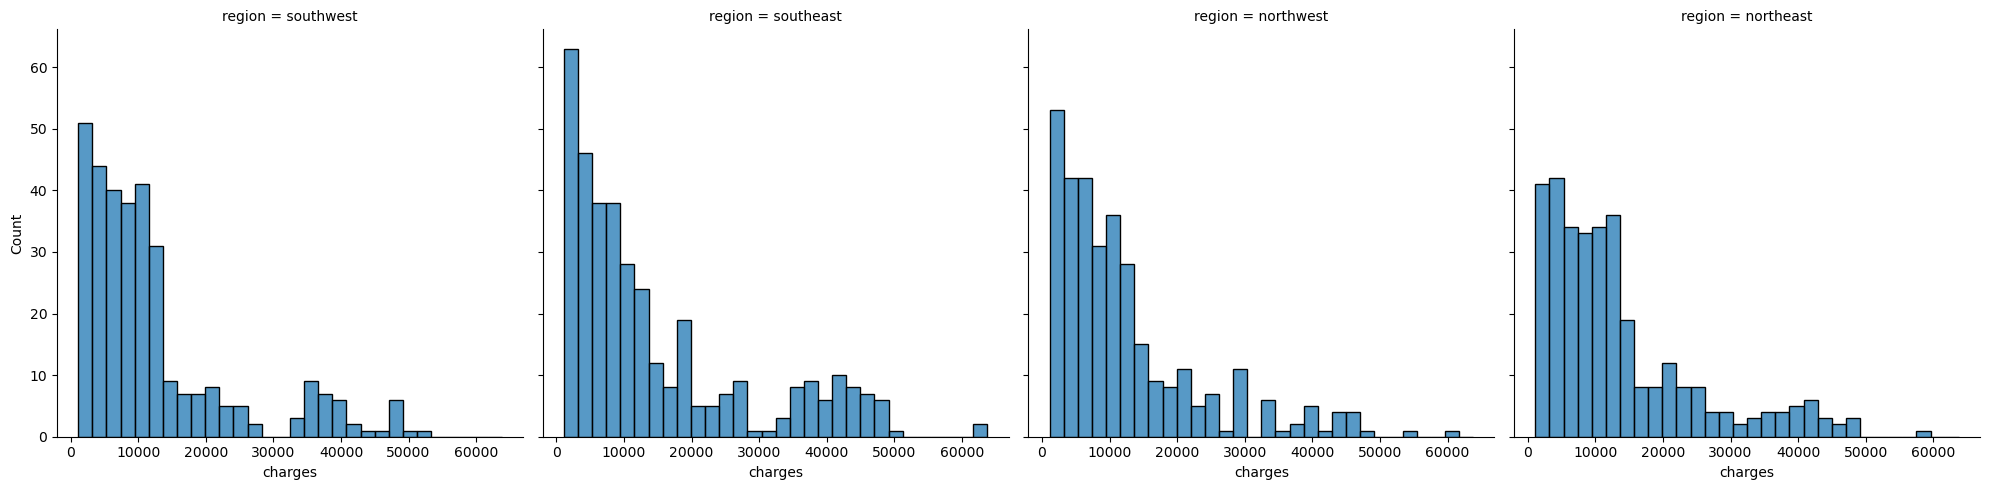

In [28]:
sns.displot(data=medical_df, x='charges', col='region')

Most people have charges over 12000 when plotted against sex. Inconclusive insights for charges when plotted against or against region.

### Smoker

In [29]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [32]:
medical_df.groupby('smoker').median()['charges']

C:\Users\CICD STUDENT\AppData\Local\Temp\ipykernel_2940\760973497.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  medical_df.groupby('smoker').median()['charges']


smoker
no      7345.40530
yes    34456.34845
Name: charges, dtype: float64

In [33]:
medical_df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

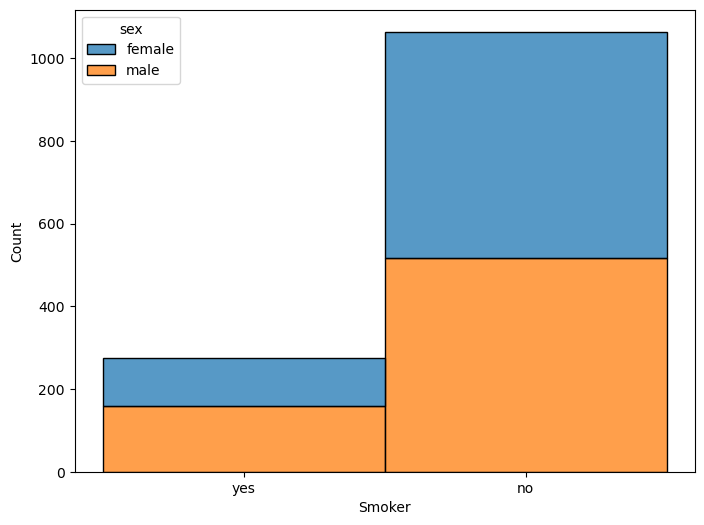

In [35]:
plt.figure(figsize=(8, 6))
sns.histplot(data=medical_df, x='smoker', hue='sex', multiple='stack')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.show()

> **EXERCISE**: Visualize the distributions of the "sex", "region" and "children" columns and report your observations. 

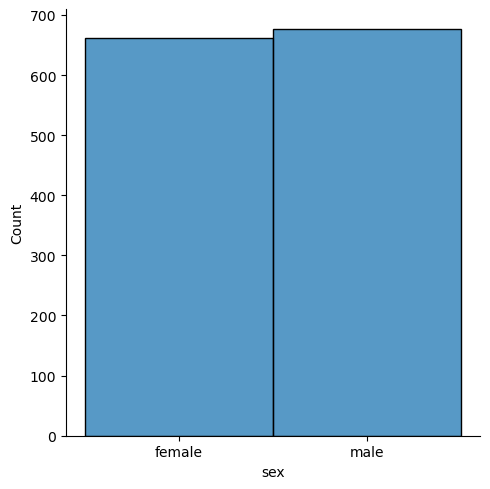

In [36]:
# distribution of sex

sns.displot(data=medical_df, x='sex')

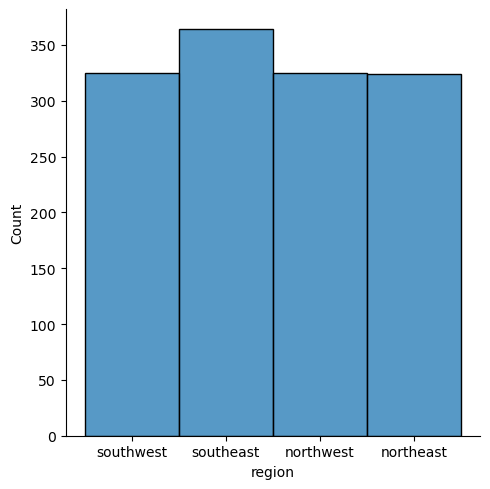

In [37]:
# distribution of region

sns.displot(data=medical_df, x='region')

<Figure size 600x400 with 0 Axes>

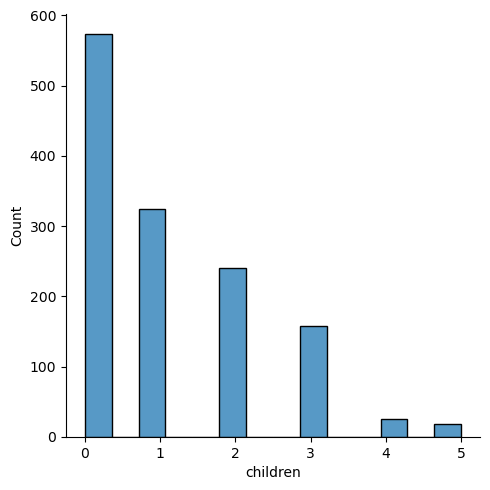

In [38]:
# distribution of children

plt.figure(figsize=(6, 4))
sns.displot(data=medical_df, x='children')

Region and sex have uniform distribution. We see fewer people having less children.

Having looked at individual columns, we can now visualize the relationship between "charges" (the value we wish to predict) and other columns.

### Age and Charges

Let's visualize the relationship between "age" and "charges" using a scatter plot. Each point in the scatter plot represents one customer. We'll also use values in the "smoker" column to color the points.

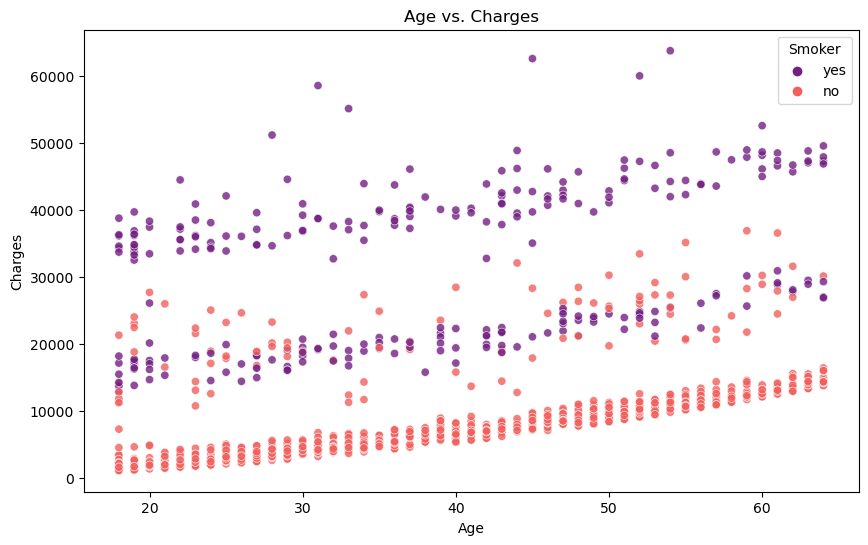

In [39]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=medical_df, x='age', y='charges', hue='smoker', palette='magma', alpha=0.8)
plt.title('Age vs. Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend(title='Smoker')
plt.show()

* The general trend seems to be that medical charges increase with age, as we might expect. However, there is significant variation at every age, and it's clear that age alone cannot be used to accurately determine medical charges.


* We can see three "clusters" of points, each of which seems to form a line with an increasing slope:

     1. The first and the largest (bottom) cluster consists primary of presumably "healthy non-smokers" who have relatively low medical charges compared to others
     
     2. The second (middle) cluster contains a mix of smokers and non-smokers. It's possible that these are actually two distinct but overlapping clusters: "non-smokers with medical issues" and "smokers without major medical issues".
     
     3. The final (top) cluster consists exclusively of smokers, presumably smokers with major medical issues that are possibly related to or worsened by smoking.

### BMI and Charges

Let's visualize the relationship between BMI (body mass index) and charges using another scatter plot. Once again, we'll use the values from the "smoker" column to color the points.

<Axes: xlabel='bmi', ylabel='charges'>

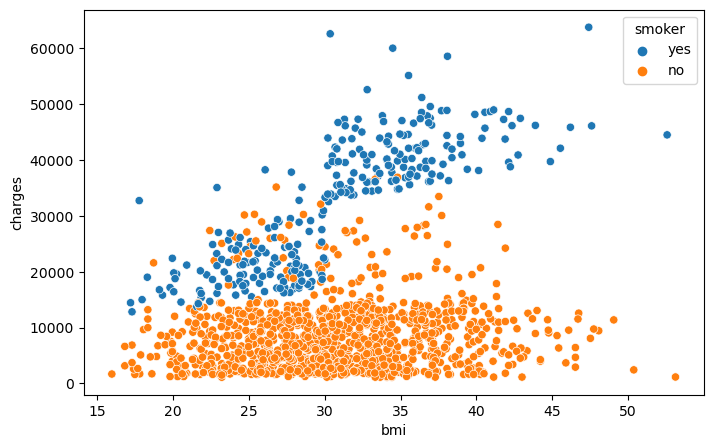

In [42]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=medical_df, x='bmi', y='charges', hue='smoker')

For non-smokers, an increase in BMI is not related to an increase in medical charges. However, medical charges seem to be significantly higher for smokers with a BMI greater than 30.

> **EXERCISE**: Create some more graphs to visualize how the "charges" column is related to other columns ("children", "sex", "region" and "smoker"). Summarize the insights gathered from these graphs.
>
> *Hint*: Use violin plots (`px.violin`) and bar plots (`sns.barplot`)

<Axes: xlabel='children', ylabel='charges'>

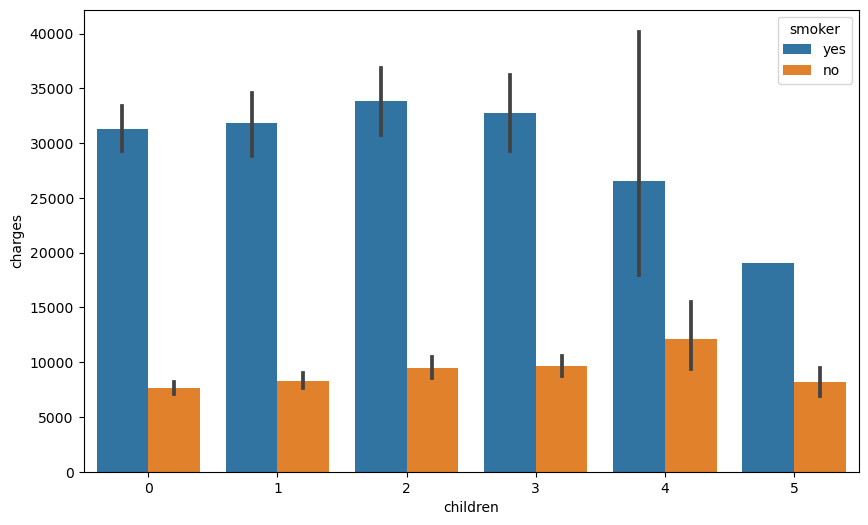

In [52]:
# charges and children

plt.figure(figsize=(10, 6))
sns.barplot(data=medical_df, x='children', y='charges', hue='smoker')

<Axes: xlabel='region', ylabel='charges'>

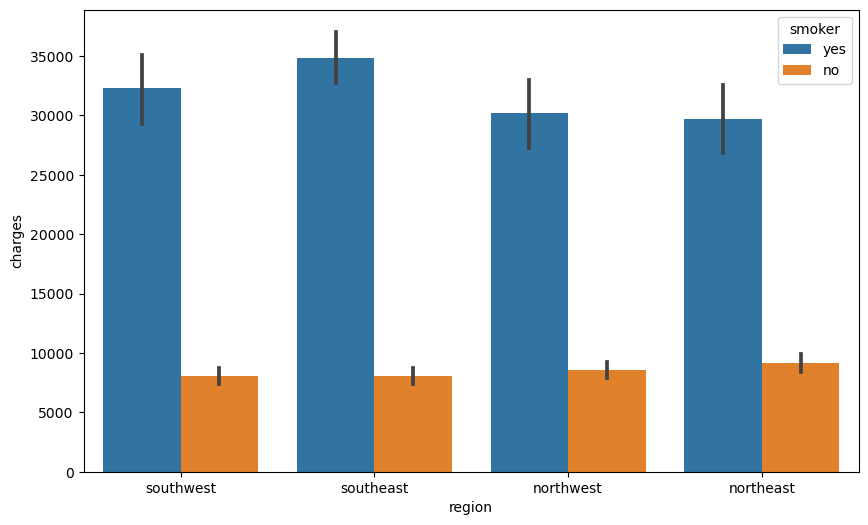

In [51]:
# charges and region

plt.figure(figsize=(10, 6))
sns.barplot(data=medical_df, x='region', y='charges', hue='smoker')

<Axes: xlabel='sex', ylabel='charges'>

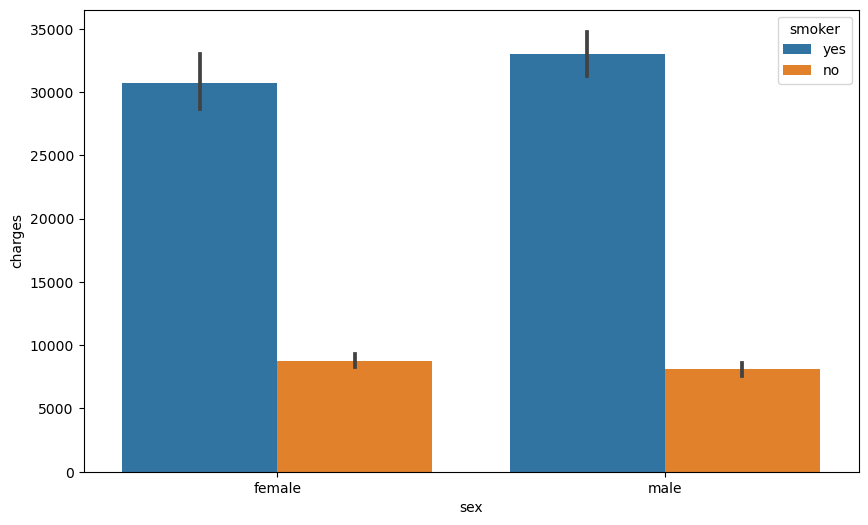

In [50]:
# charges and sex

plt.figure(figsize=(10, 6))
sns.barplot(data=medical_df, x='sex', y='charges', hue='smoker')

<Axes: xlabel='smoker', ylabel='charges'>

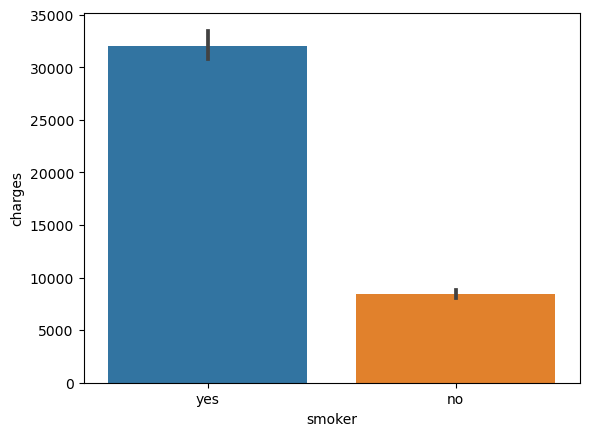

In [53]:
sns.barplot(data=medical_df, x='smoker', y='charges')

### Correlation

The values in some columns are more closely related to the values in "charges" compared to other columns, e.g. "age" and "charges" seem to grow together, whereas "bmi" and "charges" don't.

This relationship is often expressed numerically using a measure called the _correlation coefficient_, which can be computed using the `.corr` method of a Pandas series.

In [55]:
medical_df.corr()

C:\Users\CICD STUDENT\AppData\Local\Temp\ipykernel_2940\4290363667.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  medical_df.corr()


,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [56]:
medical_df.charges.corr(medical_df.age)

0.29900819333064765

In [57]:
medical_df.charges.corr(medical_df.bmi)

0.19834096883362892

In [58]:
medical_df.charges.corr(medical_df.children)

0.06799822684790487

In [59]:
# computing correlation for the categorical columns

smoker_values = {'no': 0, 'yes': 1}
smoker_numeric = medical_df.smoker.map(smoker_values)

medical_df.charges.corr(smoker_numeric)

0.7872514304984772

The result of `.corr` is called a correlation matrix and is often visualized using a heatmap.

C:\Users\CICD STUDENT\AppData\Local\Temp\ipykernel_2940\1428605799.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=medical_df.corr(), cmap='Reds', annot=True)


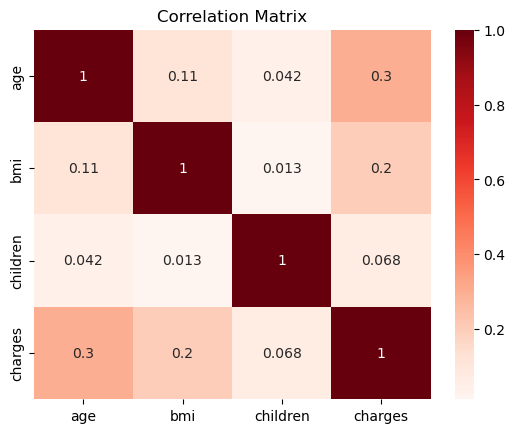

In [61]:
sns.heatmap(data=medical_df.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix');